In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('20200124_ews_observations.csv',parse_dates=['ObservationDate'],
                index_col=1)

In [3]:
df.index = pd.DatetimeIndex(df.index).to_period('min')

In [4]:
df.head()

,PatientId,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
ObservationDate,,,,,,,,,,,,,,,,,
2019-05-01 13:27,29,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
2019-05-01 15:27,30,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2019-05-01 15:54,31,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
2019-05-01 16:07,32,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
2019-05-01 17:03,33,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 171736 entries, 2019-05-01 13:27 to 2020-01-02 09:03
Freq: T
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   PatientId     171736 non-null  int64  
 1   EwsProcedure  171736 non-null  object 
 2   EWS_Total     171736 non-null  int64  
 3   SBP           160949 non-null  float64
 4   SBP_Score     160949 non-null  float64
 5   LOC           171736 non-null  object 
 6   LOC_Score     171736 non-null  int64  
 7   SpO2          171734 non-null  float64
 8   SpO2_Score    171734 non-null  float64
 9   Add_O2        171734 non-null  object 
 10  Add_O2_Score  171734 non-null  float64
 11  HR            171736 non-null  int64  
 12  HR_Score      171736 non-null  int64  
 13  RR            171736 non-null  int64  
 14  RR_Score      171736 non-null  int64  
 15  TEMP          171736 non-null  float64
 16  TEMP_Score    171736 non-null  int64  
dtypes: float64(6),

In [6]:
df.PatientId.value_counts()

1743    643
5797    441
1261    441
630     356
1841    351
       ... 
7700      1
1360      1
5781      1
976       1
2047      1
Name: PatientId, Length: 10136, dtype: int64

In [7]:
df.isnull().sum()

PatientId           0
EwsProcedure        0
EWS_Total           0
SBP             10787
SBP_Score       10787
LOC                 0
LOC_Score           0
SpO2                2
SpO2_Score          2
Add_O2              2
Add_O2_Score        2
HR                  0
HR_Score            0
RR                  0
RR_Score            0
TEMP                0
TEMP_Score          0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
patient = df[df.PatientId == 1743]

In [10]:
patient.isnull().sum()

PatientId       0
EwsProcedure    0
EWS_Total       0
SBP             0
SBP_Score       0
LOC             0
LOC_Score       0
SpO2            0
SpO2_Score      0
Add_O2          0
Add_O2_Score    0
HR              0
HR_Score        0
RR              0
RR_Score        0
TEMP            0
TEMP_Score      0
dtype: int64

<AxesSubplot:xlabel='ObservationDate'>

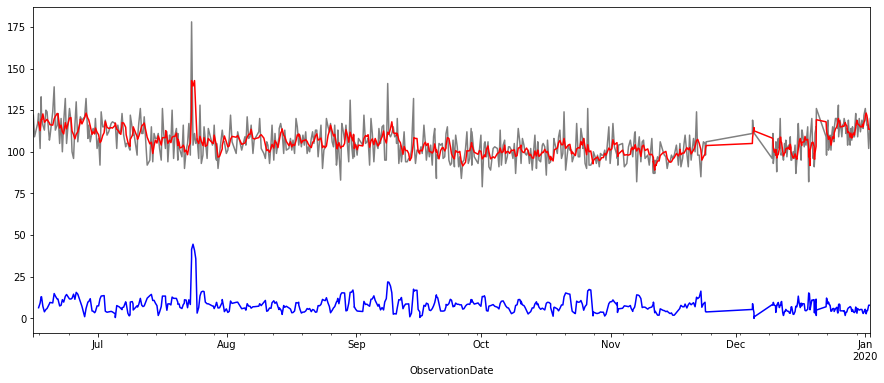

In [24]:
patient.SBP.plot(color='gray')
patient.SBP.rolling(window=4).mean().plot(color='red')
patient.SBP.rolling(window=4).std().plot(color='blue')

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
result = adfuller(patient.SBP,autolag='AIC')

In [20]:
print(f'ADF Statistic: {result[0]}')
print(f'p-Value : {result[1]}')
for key,value in result[4].items():
    print('Critical Values: ')
    print(f'{key}, {value}')

ADF Statistic: -2.8120727655336166
p-Value : 0.05656984572351107
Critical Values: 
1%, -3.441277537487585
Critical Values: 
5%, -2.8663610578661083
Critical Values: 
10%, -2.5693375106104357


In [21]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [22]:
acf_50 = acf(patient.knn_mean, nlags=50)
pacf_50 = pacf(patient.knn_mean,nlags=50)

AttributeError: 'DataFrame' object has no attribute 'knn_mean'

AttributeError: 'DataFrame' object has no attribute 'knn_mean'

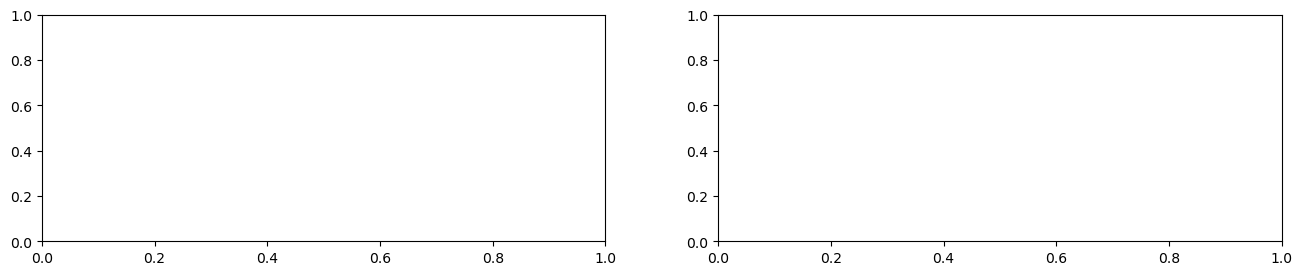

In [23]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(patient.knn_mean.tolist(), lags=50, ax=axes[0])
plot_pacf(patient.knn_mean.tolist(), lags=50, ax=axes[1])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(patient.knn_mean, order=(3,0,3)) # p d q
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
model_fit.plot_predict(dynamic=False)
model_fit.forecast(steps=1)

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = patient.knn_mean[:round(len(patient.knn_mean)*75/100)]
test = patient.knn_mean[round(len(patient.knn_mean)*75/100):]

In [ ]:
train

In [ ]:
train.plot()

In [ ]:
test

In [ ]:
test.plot()

In [ ]:
# Build Model
model = ARIMA(patient.knn_mean, order=(3, 0, 3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(161, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc,name='SBP' ,index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [ ]:
fitted.plot_predict(482)

In [ ]:
#train.plot()
fitted.plot_predict(482)
train.plot()